In [1]:
!pip install -q kaggle

In [2]:
!mkdir ~/.kaggle 

In [3]:
!touch ~/.kaggle/kaggle.json

In [4]:
api_token = {"username":"sameer903211","key":"53f6830e080a9e5022e58765d85eb38a"}

In [6]:
import json
import os

kaggle_dir = os.path.expanduser('~/.kaggle')
os.makedirs(kaggle_dir, exist_ok=True)
kaggle_file_path = os.path.join(kaggle_dir, 'kaggle.json')

with open(kaggle_file_path, 'w') as file:
    json.dump(api_token, file)


In [7]:

!chmod 600 ~/.kaggle/kaggle.json

In [8]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia --force

Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
License(s): other
 99%|██████████████████████████████████████▊| 2.28G/2.29G [00:16<00:00, 147MB/s]
100%|███████████████████████████████████████| 2.29G/2.29G [00:16<00:00, 147MB/s]


In [28]:
import zipfile 
with zipfile.ZipFile('./chest-xray-pneumonia.zip', 'r') as zip_ref:
    zip_ref.extractall('./data')

In [29]:
import glob 
import random
import matplotlib.pyplot as plt 

def get_random_image(dir, condition):
    placeholder = " "
    if condition == 'n':
        placeholder = "NORMAL"
    elif condition == 'p':
        placeholder = "PNEUMONIA"
    else:
        raise Exception('Sorry invalid input')
    folder = f'./data/chest_xray/{dir}/{placeholder}/*.jpeg'
    img_paths = glob.glob(folder) 
    max_length = len(img_paths)
    randomNumber=random.randint(0,max_length)
    for index, item in enumerate(img_paths, start=1):
        if index == randomNumber:
            print(index,item)
            image = plt.imread(item)
            readyImage=plt.imshow(image)
            return readyImage

1306 ./data/chest_xray/train/PNEUMONIA/person1602_bacteria_4218.jpeg


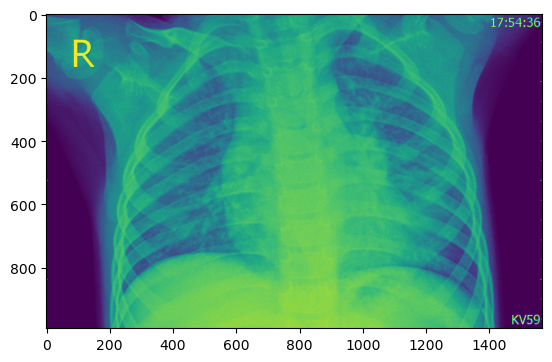

In [30]:
get_random_image('train','p')

In [31]:
from PIL import Image 

image = Image.open('data/chest_xray/test/NORMAL/IM-0001-0001.jpeg')
print(image.size)
print(image.mode)
print(image.format)


(1857, 1317)
L
JPEG


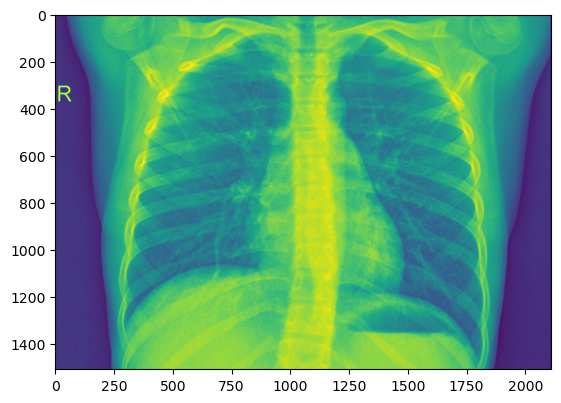

In [32]:
import matplotlib.pyplot as plt 
import  matplotlib.image as mpimg 

img = mpimg.imread('data/chest_xray/test/NORMAL/IM-0003-0001.jpeg')
imgplot = plt.imshow(img)
plt.show()

In [33]:
import glob 
import matplotlib.pyplot as plt  
from PIL import Image


folder = f'./data/chest_xray/train/*/*.jpeg'
counterPneu=0
counterNormal=0
image_paths = glob.glob(folder)

for i in image_paths:
    if 'person' in i:
        full_size_image = Image.open(i)
        im = full_size_image.resize((224,224))
        plt.imsave(fname='./data/chest_xray/train' + '/train_pneumonia' + str(counterPneu)+'.jpeg',arr=im,format='jpeg',cmap='gray')
        counterPneu+=1
    else:
        full_size_image = Image.open(i)
        im = full_size_image.resize((224,224))
        plt.imsave(fname='./data/chest_xray/train' + '/train_normal' + str(counterNormal)+'.jpeg',arr=im,format='jpeg',cmap='gray')
        counterNormal+=1
        

        
        

In [34]:
import glob 
import matplotlib.pyplot as plt  
from PIL import Image


folder = f'./data/chest_xray/test/*/*.jpeg'
counterPneu=0
counterNormal=0
image_paths = glob.glob(folder)

for i in image_paths:
    if 'person' in i:
        full_size_image = Image.open(i)
        im = full_size_image.resize((224,224))
        plt.imsave(fname='./data/chest_xray/test' + '/test_pneumonia' + str(counterPneu)+'.jpeg',arr=im,format='jpeg',cmap='gray')
        counterPneu+=1
    else:
        full_size_image = Image.open(i)
        im = full_size_image.resize((224,224))
        plt.imsave(fname='./data/chest_xray/test' + '/test_normal' + str(counterNormal)+'.jpeg',arr=im,format='jpeg',cmap='gray')
        counterNormal+=1
        

        
        

In [35]:
import glob 
import matplotlib.pyplot as plt  
from PIL import Image


folder = f'./data/chest_xray/val/*/*.jpeg'
counterPneu=0
counterNormal=0
image_paths = glob.glob(folder)

for i in image_paths:
    if 'person' in i:
        full_size_image = Image.open(i)
        im = full_size_image.resize((224,224))
        plt.imsave(fname='./data/chest_xray/val' + '/val_pneumonia' + str(counterPneu)+'.jpeg',arr=im,format='jpeg',cmap='gray')
        counterPneu+=1
    else:
        full_size_image = Image.open(i)
        im = full_size_image.resize((224,224))
        plt.imsave(fname='./data/chest_xray/val' + '/val_normal' + str(counterNormal)+'.jpeg',arr=im,format='jpeg',cmap='gray')
        counterNormal+=1
        

        
        

In [44]:
import glob
import pandas as pd

folder = './data/chest_xray/*/*.jpeg'

category = [] 
filenames = [] 
condition_of_lung = [] 

all_files= glob.glob(folder) 

for filename in all_files:
    if 'train' in filename:
        if 'pneumonia' in filename:
            category.append('train')
            filenames.append(filename)
            condition_of_lung.append('pneumonia')
        elif "normal" in filename:
            category.append("train")
            filenames.append(filename)
            condition_of_lung.append("normal")
    elif "test" in filename:
        if "pneumonia" in filename:
            category.append("test")
            filenames.append(filename)
            condition_of_lung.append("pneumonia")
        elif "normal" in filename:
            category.append("test")
            filenames.append(filename)
            condition_of_lung.append("normal")
    elif "val" in filename:
        if "pneumonia" in filename:
            category.append("val")
            filenames.append(filename)
            condition_of_lung.append("pneumonia")
        elif "normal" in filename:
            category.append("val")
            filenames.append(filename)
            condition_of_lung.append("normal")

all_data_df=pd.DataFrame({"dataset type":category,"x-ray result":condition_of_lung,"filename":filenames})

print(all_data_df.head())
        

  dataset type x-ray result                                  filename
0         test       normal  ./data/chest_xray/test/test_normal0.jpeg
1         test       normal  ./data/chest_xray/test/test_normal1.jpeg
2         test       normal  ./data/chest_xray/test/test_normal2.jpeg
3         test       normal  ./data/chest_xray/test/test_normal3.jpeg
4         test       normal  ./data/chest_xray/test/test_normal4.jpeg


/tmp/ipykernel_116/2504296966.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g=sns.catplot(x="x-ray result",col="dataset type",kind="count",palette="ch:.55",data=all_data_df,legend=True)


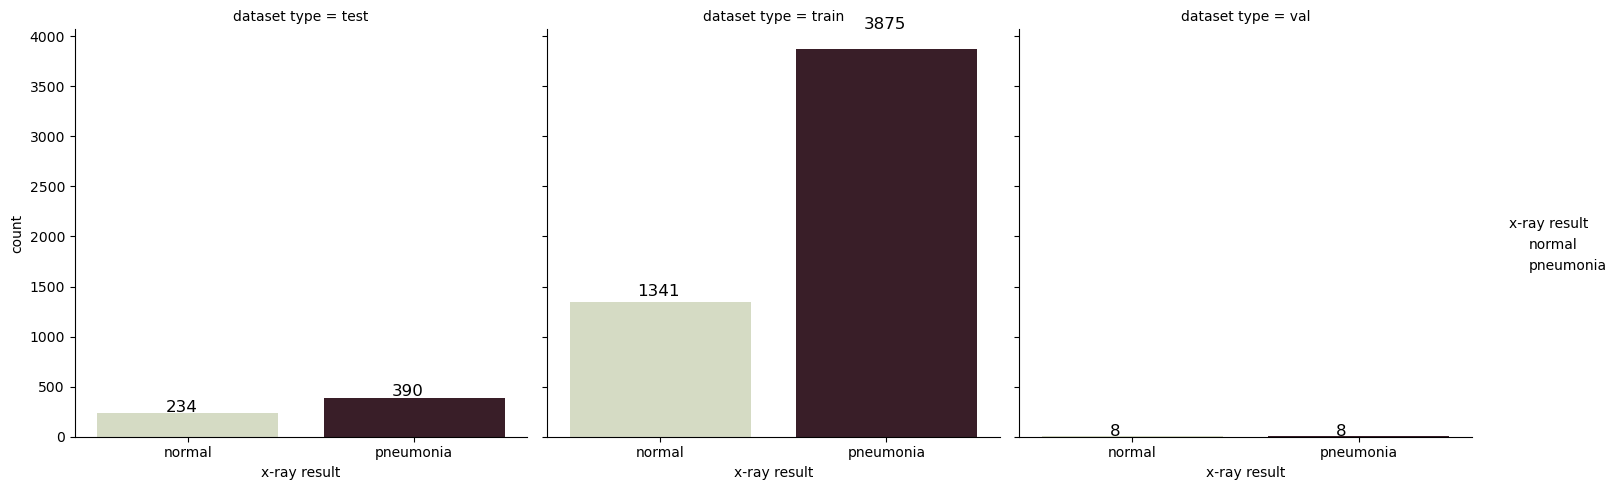

In [47]:
import seaborn as sns 

g=sns.catplot(x="x-ray result",col="dataset type",kind="count",palette="ch:.55",data=all_data_df,legend=True)

for i in range(0,3):
    ax=g.facet_axis(0,i)
    for p in ax.patches:
        ax.text(p.get_x()+0.3,
        p.get_height()*1.05,
        '{0:.0f}'.format(p.get_height()),
        color='black',
        rotation='horizontal',
        size='large')

In [46]:
!pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 8.0 MB/s eta 0:00:00ta 0:00:01


In [50]:
import glob 
import pandas as pd 
import os 

train_folder = './data/chest_xray/train/*.jpeg'
train_df_lst = pd.DataFrame(columns=['labels', 's3_path'], dtype=object)
train_imgs_path = glob.glob(train_folder)
counter = 0 
class_arg = '' 

for i in train_imgs_path:
    if 'pneumonia' in i:
        class_args = 1
    else:
        class_arg = 0 
    train_df_lst.loc[counter]=[class_arg,os.path.basename(i)]
    counter+=1
print(train_df_lst.head())


   labels             s3_path
0       0  train_normal0.jpeg
1       0  train_normal1.jpeg
2       0  train_normal2.jpeg
3       0  train_normal3.jpeg
4       0  train_normal4.jpeg


In [51]:
import glob 
import pandas as pd 
import os 

test_folder = './data/chest_xray/test/*.jpeg'
test_df_lst = pd.DataFrame(columns=['labels', 's3_path'], dtype=object)
test_imgs_path = glob.glob(test_folder)
counter = 0 
class_arg = '' 

for i in test_imgs_path:
    if 'pneumonia' in i:
        class_args = 1
    else:
        class_arg = 0 
    test_df_lst.loc[counter]=[class_arg,os.path.basename(i)]
    counter+=1
print(test_df_lst.head())


   labels            s3_path
0       0  test_normal0.jpeg
1       0  test_normal1.jpeg
2       0  test_normal2.jpeg
3       0  test_normal3.jpeg
4       0  test_normal4.jpeg


In [52]:
def save_to_lst(df,prefix):
    return df[["labels","s3_path"]].to_csv(
    f"{prefix}.lst", sep='\t',index=True,header=False
    )

save_to_lst(train_df_lst.copy(),"train")
save_to_lst(test_df_lst.copy(),"test")

In [1]:
bucket='deep-learning-project2'
print("bucket:{}".format(bucket))
region='us-west-2'
print("region:{}".format(region))
roleArn='arn:aws:s3:::deep-learning-project2'
print("roleArn:{}".format(roleArn))

bucket:deep-learning-project2
region:us-west-2
roleArn:arn:aws:s3:::deep-learning-project2


In [4]:
import os 
os.environ['DEFAULT_S3_PATH'] = bucket

In [5]:
#!aws s3 sync ./data/chest_xray/train s3://${DEFAULT_S3_BUCKET}/train/

In [6]:
#!aws s3 sync ./data/chest_xray/train s3://${DEFAULT_S3_BUCKET}/test/

In [7]:
#import boto3

#boto3.Session().resource('s3').Bucket(bucket).Object("train.lst").upload_file('./train.lst')

In [8]:
#boto3.Session().resource('s3').Bucket(bucket).Object("test.lst").upload_file('./test.lst')

In [1]:
bucket='deep-learning-project2'
print("bucket:{}".format(bucket))
region='us-west-2'
print("region:{}".format(region))
roleArn='arn:aws:s3:::deep-learning-project2'
print("roleArn:{}".format(roleArn))

bucket:deep-learning-project2
region:us-west-2
roleArn:arn:aws:s3:::deep-learning-project2


In [3]:
import sagemaker 
from sagemaker import image_uris 
import boto3
from sagemaker import get_execution_role  

sess = sagemaker.Session()
algorithm_image=image_uris.retrieve(
    region=boto3.Session().region_name,
    framework="image-classification"
    
)
#s3_output_location=f"s3://{bucket}/models/image_model"

print(algorithm_image)

433757028032.dkr.ecr.us-west-2.amazonaws.com/image-classification:1


In [4]:
role = get_execution_role()
print(role)

arn:aws:iam::211125658443:role/service-role/AmazonSageMaker-ExecutionRole-20240731T112509


In [17]:
import sagemaker 

'''image_classification_model = sagemaker.estimator.Estimator(
    algorithm_image,
    role = role,
    instance_count = 1,
    instance_type = 'ml.p2.xlarge',
    volume_size=50,
    max_run=432000,
    input_mode="File",
    output_path=s3_output_location,
    sagemaker_session=sess
)
print(img_classifier_model)'''


'image_classification_model = sagemaker.estimator.Estimator(\n    algorithm_image,\n    role = role,\n    instance_count = 1,\n    instance_type = \'ml.p2.xlarge\',\n    volume_size=50,\n    max_run=432000,\n    input_mode="File",\n    output_path=s3_output_location,\n    sagemaker_session=sess\n)\nprint(img_classifier_model)'

In [18]:
import glob 
count = 0 

for filepath in glob.glob('./data/chest_xray/train/*.jpeg'):
    count+=1
print(count)

5216


In [ ]:
img_classifier_model.set_hyperparameters(
image_shape='3,224,224',
num_classes=2,
use_pretrained_model=1,
num_training_samples=count,
augmentation_type='crop_color_transform',
epochs=15,
early_stopping=True,
early_stopping_min_epochs=8,
early_stopping_tolerance=0.0,
early_stopping_patience=5,
lr_scheduler_factor=0.1,
lr_scheduler_step='8,10,12')

In [ ]:
from sagemaker.tuner import CategoricalParameter,ContinuousParameter,HyperparameterTuner

hyperparameter_ranges={
    "learning_rate":ContinuousParameter(0.01,0.1),
    "mini_batch_size":CategoricalParameter([8,16,32]),
    "optimizer":CategoricalParameter(["sgd","adam"])
}

In [ ]:
objective_metric_name = 'validation:accuracy',
objective_type = 'Maximize',
max_jobs = 5
max_parallel_jobs = 1

In [ ]:
from sagemaker.session import TrainingInput

model_inputs={
    "train":sagemaker.inputs.TrainingInput(s3_data=f"s3://{bucket}/train/",content_type="application/x-image"),
    "validation":sagemaker.inputs.TrainingInput(s3_data=f"s3://{bucket}/test/",content_type="application/x-image"),
    "train_lst":sagemaker.inputs.TrainingInput(s3_data=f"s3://{bucket}/train.lst",content_type="application/x-image"),
    "validation_lst":sagemaker.inputs.TrainingInput(s3_data=f"s3://{bucket}/test.lst",content_type="application/x-image"),
}

In [ ]:
import time 
job_name_prefix="classifier"
timestamp=time.strftime("-%Y-%m-%d-%H-%M-%S",time.gmtime())
job_name=job_name_prefix+timestamp

In [19]:
#tuner.fit(inputs=model_inputs,job_name=job_name,logs=True)

In [5]:
import sagemaker 
from sagemaker import get_execution_role
role = get_execution_role()

In [6]:
model = sagemaker.model.Model(
    image_uri = algorithm_image,
    model_data = 's3://deep-learning-project2/models/model (1).tar.gz',
    role = role
)

In [8]:
endpoint_name = 'image-classification-03' 

deployment = model.deploy(
    initial_instance_count = 1,
    instance_type='ml.m4.xlarge',
    endpoint_name=endpoint_name
)

---------!

In [9]:
from sagemaker import Predictor 
predictor = Predictor('image-classification-03')

In [10]:
from sagemaker.serializers import IdentitySerializer

file_name = 'data/chest_xray/val/val_pneumonia5.jpeg'

predictor.serializer = IdentitySerializer('Image/jpeg')
with open(file_name, 'rb') as f:
    payload = f.read()

inference = predictor.predict(data=payload)
print(inference)


b'[0.0003175859746988863, 0.9996824264526367]'


In [11]:
print(inference[1])

48


In [10]:
import glob 
import json 
import numpy as np 
file_path = 'data/chest_xray/val/*.jpeg'

files = glob.glob(file_path)

y_true = [] 
y_pred = [] 

def make_pred():
    for file in files:
        if "normal" in file:
            with open(file,"rb") as f:
                payload=f.read()
                inference=predictor.predict(data=payload).decode("utf-8")
                result=json.loads(inference)
                predicted_class=np.argmax(result)
                y_true.append(0)
                y_pred.append(predicted_class)
        elif "pneumonia" in file:
            with open(file,"rb") as f:
                payload=f.read()
                inference=predictor.predict(data=payload).decode("utf-8")
                result=json.loads(inference)
                predicted_class=np.argmax(result)
                y_true.append(1)
                y_pred.append(predicted_class)
make_pred()
print(y_pred)
print(y_true)


[0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1]


In [11]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_true, y_pred)



array([[6, 2],
       [1, 7]])

In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.75      0.80         8
           1       0.78      0.88      0.82         8

    accuracy                           0.81        16
   macro avg       0.82      0.81      0.81        16
weighted avg       0.82      0.81      0.81        16

